This project is about Bank customer Churn.

The project was gotten from Kaggle. 

I will be looking at the reseaons why customer leaves the bank 

How satisfied the customers are

The number of customers that Exited the Bank

and also which gender were more or less satisfied.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df = pd.read_csv("Customer-Churn-Records.csv")
print(df.shape)
df.head()

(10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
#to check for the columns of the dataframe
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [5]:
#dropping columns that are not needed
df.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace=True)

In [6]:
#to get the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [7]:
#to check for the total sum of missing values
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
#to calculate the sum statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [9]:
#To check for duplicate values
df.duplicated().sum()

0

In [10]:
df.isnull().sum()/len(df)

CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

In [11]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

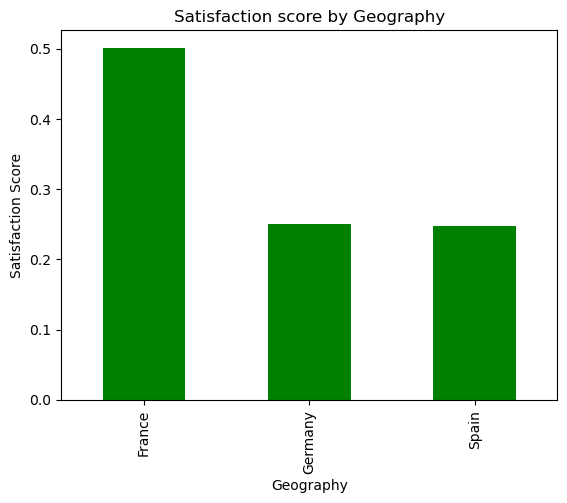

<Figure size 1000x500 with 0 Axes>

In [23]:
# creating the bar plot
df["Geography"].value_counts(normalize=True).plot(
    kind="bar",xlabel="Geography",ylabel="Satisfaction Score",title="Satisfaction score by Geography", color ='Green'
);
plt.show()
fig = plt.figure(figsize = (10, 5)),

In [12]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

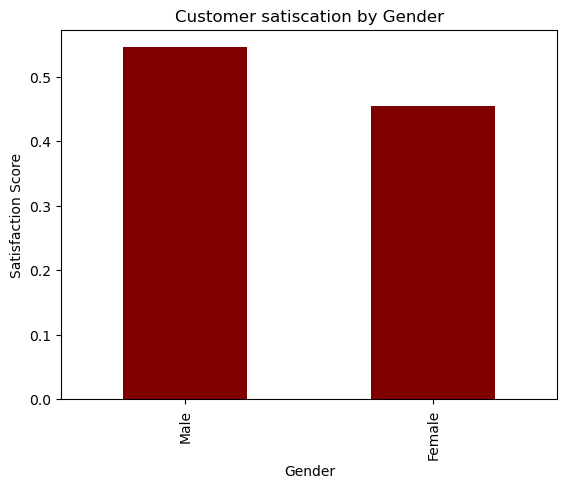

<Figure size 1000x500 with 0 Axes>

In [24]:
# creating the bar plot
df["Gender"].value_counts(normalize=True).plot(
    kind="bar",xlabel="Gender",ylabel="Satisfaction Score",title="Customer satiscation by Gender", color ='maroon'
);
plt.show()
fig = plt.figure(figsize = (10, 5))

In [13]:
df["Satisfaction Score"].value_counts(ascending = True)

1    1932
5    2004
4    2008
2    2014
3    2042
Name: Satisfaction Score, dtype: int64

In [16]:
df["Card Type"].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [20]:
# Create pivot table
Card_Type_pivot = pd.pivot_table(
    df, index="Card Type", values="Exited", aggfunc=np.mean
).sort_values(by="Exited")
Card_Type_pivot

,Exited
Card Type,
GOLD,0.192646
SILVER,0.201122
PLATINUM,0.203607
DIAMOND,0.217790


In [18]:
df["Exited"].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

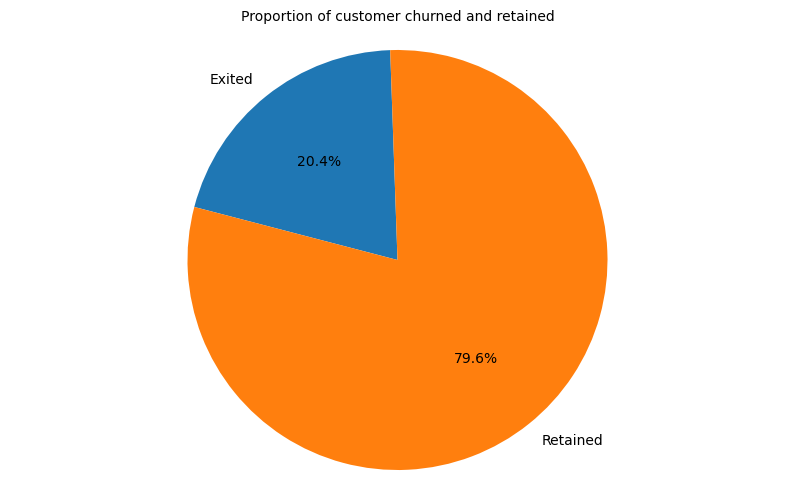

In [43]:
labels = "Exited", "Retained"
sizes = [df.Exited[df["Exited"]==1].count(),df.Exited[df['Exited']==0].count()]
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=92)
ax.axis('equal')
plt.title("Proportion of customer churned and retained", size = 10)
plt.show()

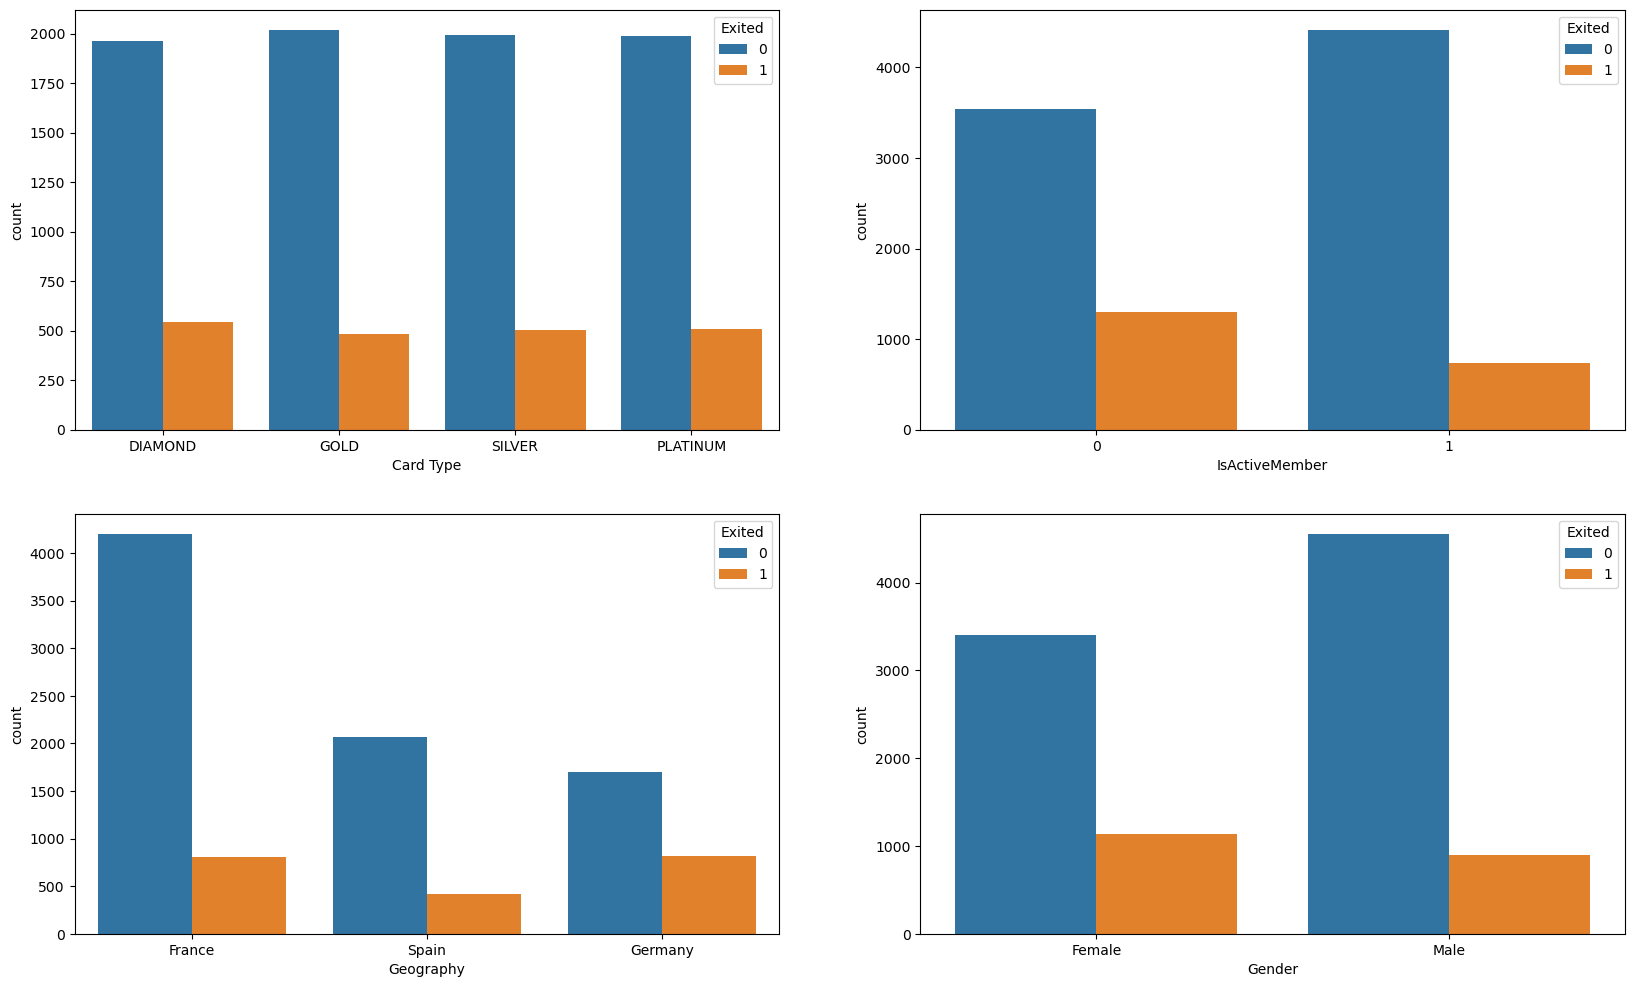

In [73]:
 fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Card Type', hue= "Exited", data=df, ax= axarr[0][0])
sns.countplot(x='Geography', hue= "Exited", data=df, ax= axarr[1][0])
sns.countplot(x='IsActiveMember', hue= "Exited", data=df, ax= axarr[0][1])
sns.countplot(x='Gender', hue= "Exited", data=df, ax= axarr[1][1]);

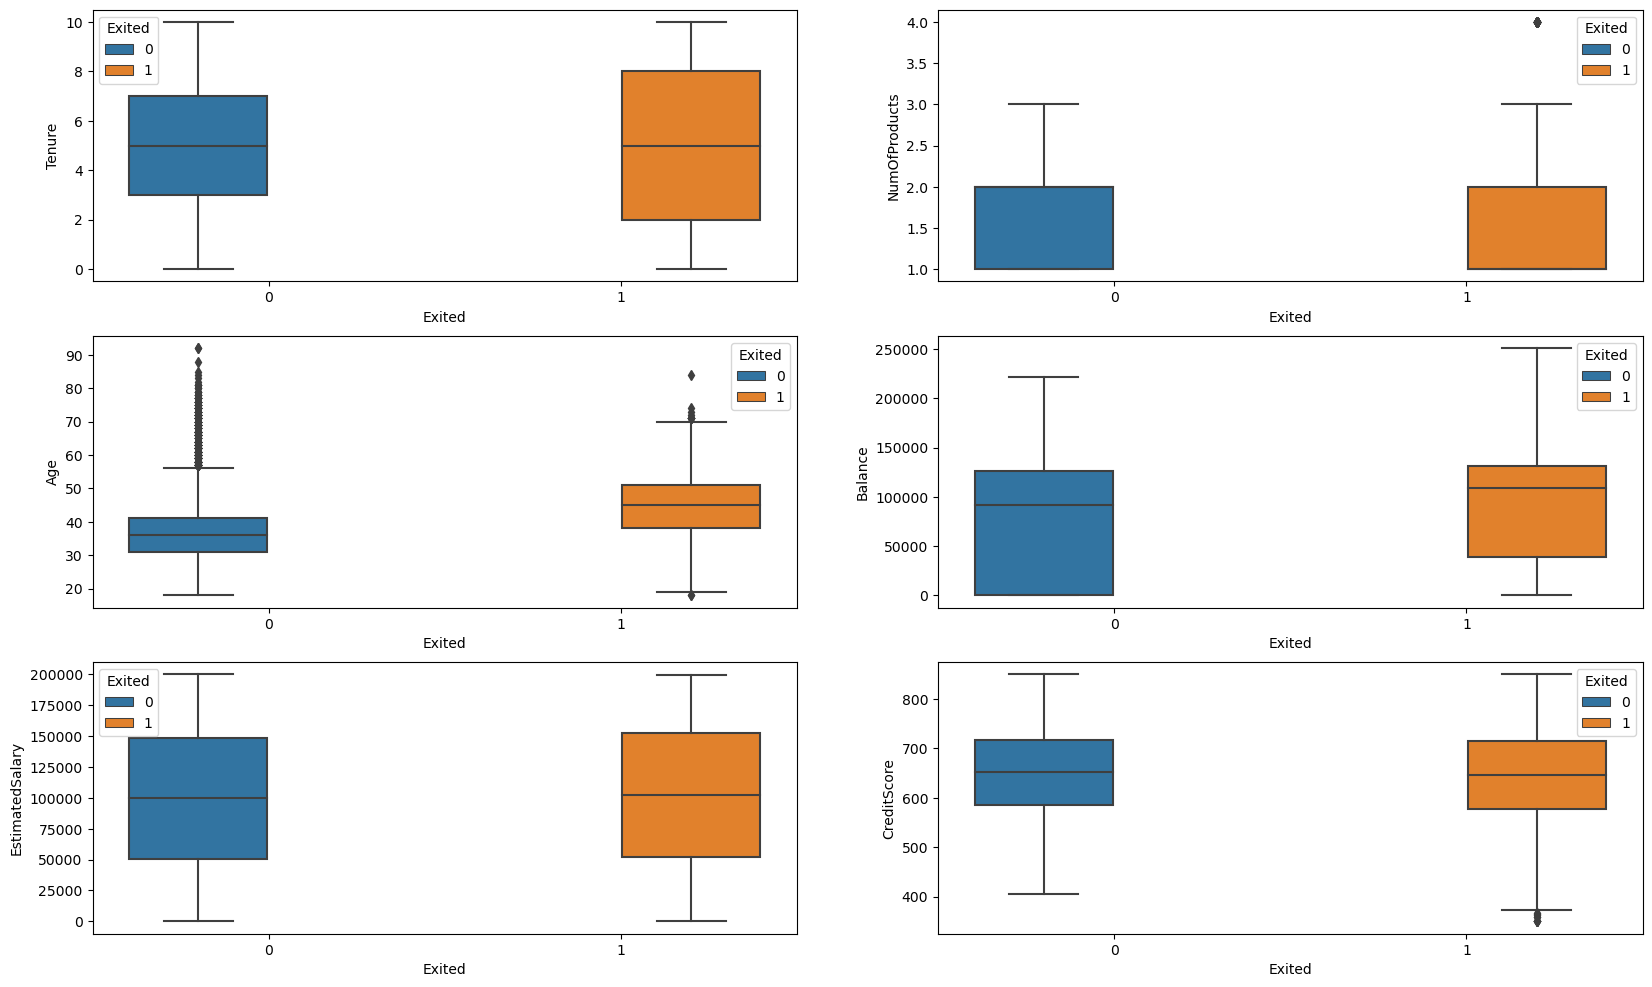

In [71]:
 fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(data=df, y="Tenure", x="Exited", hue="Exited", ax = axarr[0][0])
sns.boxplot(data=df, y="Age", x="Exited", hue="Exited", ax = axarr[1][0])
sns.boxplot(data=df, y="NumOfProducts", x="Exited", hue="Exited", ax = axarr[0][1])
sns.boxplot(data=df, y="Balance", x="Exited", hue="Exited", ax = axarr[1][1])
sns.boxplot(data=df, y="EstimatedSalary", x="Exited", hue="Exited", ax = axarr[2][0])
sns.boxplot(data=df, y="CreditScore", x="Exited", hue="Exited", ax = axarr[2][1]);